<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align='center'> Máquinas de Soporte Vectorial </h1>

<h2> Introducción </h2>

Las máquinas de soporte vectorial (SVM, por sus siglas en inglés) son un poderoso conjunto de algoritmos de aprendizaje supervisado utilizados para la clasificación y regresión. Su popularidad radica en su capacidad para encontrar el hiperplano óptimo que mejor separa las clases en un espacio de características de alta dimensionalidad. Inspiradas en la teoría del aprendizaje estadístico, las SVM se basan en el concepto de encontrar la mejor frontera de decisión entre clases, maximizando el margen de separación entre ellas. Esto implica identificar un subconjunto de puntos de datos denominados vectores de soporte, que son cruciales para definir la posición del hiperplano.

Al utilizar técnicas de optimización convexa, las SVM pueden manejar eficazmente conjuntos de datos complejos y no lineales, gracias a su capacidad para transformar el espacio de características mediante funciones núcleo. Esta flexibilidad les permite capturar relaciones no lineales entre variables de entrada, lo que las hace útiles en una amplia gama de aplicaciones, desde la clasificación de imágenes y reconocimiento de voz hasta el análisis de textos y la bioinformática. Con su robusta capacidad para generalizar patrones incluso en entornos ruidosos, las SVM continúan siendo una herramienta fundamental en el arsenal de algoritmos de aprendizaje automático.

<h2> Clasificadores de soporte vectorial </h2>

La siguiente simulación muestra el ejercicio de manera gráfica:

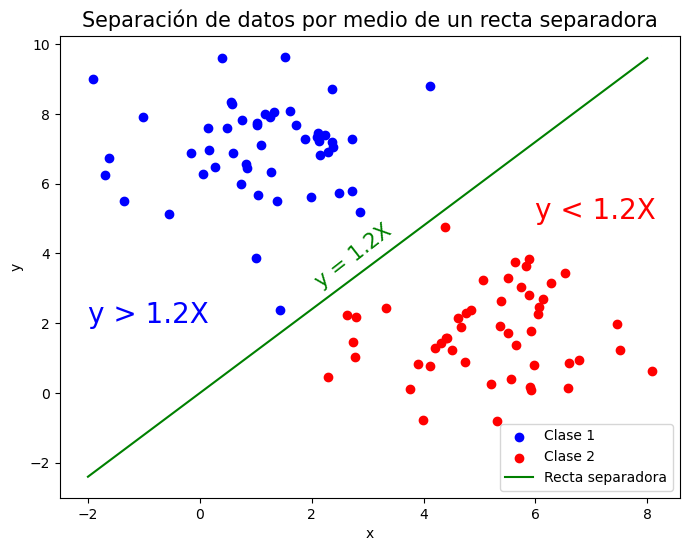

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

# Number of data points
num_points = 50

# Generate random data points for two classes
class1_x = np.random.normal(1, 1.3, num_points)
class1_y = np.random.normal(7, 1.3, num_points)

class2_x = np.random.normal(5, 1.3, num_points)
class2_y = np.random.normal(2, 1.3, num_points)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(class1_x, class1_y, color='blue', label='Clase 1')
plt.scatter(class2_x, class2_y, color='red', label='Clase 2')

x_values = np.linspace(-2, 8, 100)
y_values = 1.2 * x_values
plt.plot(x_values, y_values, linestyle='-', color='green', label='Recta separadora')

plt.annotate('y = 1.2X', xy = (2,3), rotation=38, color = 'green', size=15)
plt.annotate('y > 1.2X', xy = (-2,2), color = 'blue', size=20)
plt.annotate('y < 1.2X', xy = (6,5), color = 'red', size=20)

plt.title('Separación de datos por medio de un recta separadora', size=15)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

<h3> Hiperplano separador </h3>

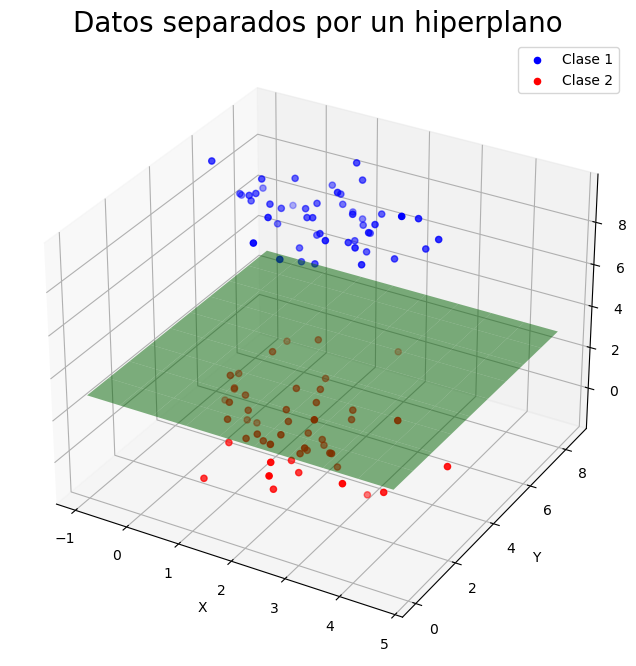

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 50

# Generate random data points for two classes in 3D space
class1_x = np.random.normal(1, 1, num_points)
class1_y = np.random.normal(7, 1, num_points)
class1_z = np.random.normal(7, 1, num_points)

class2_x = np.random.normal(2, 1, num_points)
class2_y = np.random.normal(2, 1, num_points)
class2_z = np.random.normal(2, 1, num_points)

# Combine the data points
X = np.concatenate((class1_x, class2_x))
Y = np.concatenate((class1_y, class2_y))
Z = np.concatenate((class1_z, class2_z))

# Plot the data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class1_x, class1_y, class1_z, color='blue', label='Clase 1')
ax.scatter(class2_x, class2_y, class2_z, color='red', label='Clase 2')

x_grid, y_grid = np.meshgrid(np.linspace(min(class1_x), 
                                         max(class1_x), 
                                         10), 
                             np.linspace(min(class1_y), 
                                         max(class1_y), 10))

x_grid, y_grid = np.meshgrid(np.linspace(min(class1_x.min(), class2_x.min()), max(class1_x.max(), class2_x.max()), 10),
                               np.linspace(min(class1_y.min(), class2_y.min()), max(class1_y.max(), class2_y.max()), 10))
z_grid = np.full_like(x_grid, 3)

ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, color='green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Datos separados por un hiperplano', size=20)
ax.legend()
plt.show()


<h2> Modelo matemático </h2>

Suponga que se tiene un conjunto de datos para $N$ individuos:

$$D = \left\{ (\mathbf{x_{1}}, y_{1}), (\mathbf{x_{2}}, y_{2}), ..., (\mathbf{x_{N}}, y_{N}) \right\}$$

dónde $X_{i}$ es el vector de características del individuo $i = 1,2, ..., N$, y $y$ es una etiqueta con la clasificación a la que pertenece el individuo $i$:

$$ y_{i} = \begin{cases}
 1 & \text{ Si el individuo pertenece a la clase} \\
 -1 & \text{ Si el individuo no pertenece a la clase}
\end{cases}$$

Ahora, nos interesa encontrar un hiperplano 

$$ \mathbf{w}^{T} \mathbf{X} - b = 0$$

tal que

$$ \begin{cases}
 \mathbf{w}^{T} \mathbf{X} - b > 0 & \text{ Si } y = 1\\
 \mathbf{w}^{T} \mathbf{X} - b < 0 & \text{ Si } y = -1
\end{cases}$$

Note que esta expresión matemática puede ser expresada como

$$\mathbf{y} \left( \mathbf{w}^{T} \mathbf{X} - b \right) > 1$$

y, es interpretada como la restricción que debe de satisfacerse para encontrar $\mathbf{w}$, así el problema que queremos resolver es

$$ \min_{\mathbf{w}, b} \vert \vert \mathbf{w} \vert \vert ^{2} _{2} \hspace{0.2in} \text{ s.a. } \hspace{0.2in} \mathbf{y} \left( \mathbf{w}^{T} \mathbf{X} - b \right) > 1$$

donde $\vert \vert \mathbf{w} \vert \vert ^{2} _{2}= \sum_{i = 1}^{k} w_{i} ^{2}$.

<h2> Datos no separables linealmente </h2>

Como ya se habría podido deducir, existen datos que no son linealmente separables, y, para estos casos el modelo anterior no funciona también. Vea por ejemplo el siguiente caso:

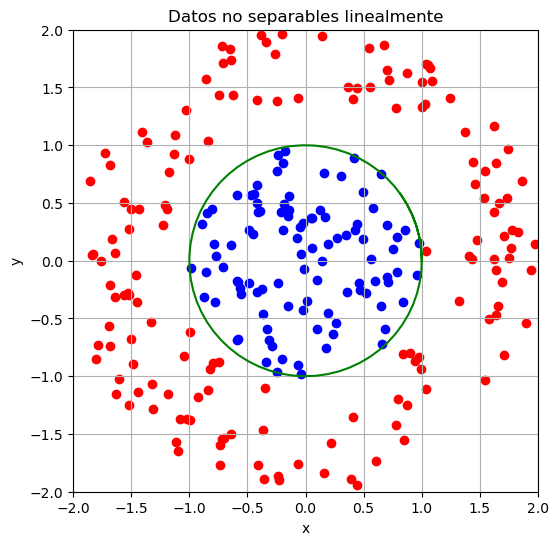

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

num_in = 100
num_out = 150

np.random.seed(seed=100)
radio_in = np.sqrt(np.random.rand(num_in))
radio_out = np.sqrt(np.random.rand(num_out)) + 1.0

theta_in = np.random.rand(num_in) * 2 * np.pi -np.pi
theta_out = np.random.rand(num_out) * 2* np.pi - np.pi

x_in = radio_in * np.cos(theta_in)
y_in = radio_in * np.sin(theta_in)

x_out = radio_out * np.cos(theta_out)
y_out = radio_out * np.sin(theta_out)


plt.close('all')
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_out, y_out, color ='red')
plt.scatter(x_in, y_in, color ='blue')
# círculo
_t = np.arange(0,7,0.1)
_x = np.cos(_t)
_y = np.sin(_t)
plt.plot(_x,_y,'g-')
plt.xlim(-2,2)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos no separables linealmente')
plt.grid(True)
plt.show()

Afortunadamente, contamos con una herramienta poderosa para transformar un conjunto de datos de tal forma que sean linealmente separables.

<h3> Funciones Kernel </h3>

La estrategia para transformar un conjunto de datos no separable linealmente en uno que sí sea separable linealmente, consiste en incrementar las dimensiones del espacio por medio de una transformación de los datos originales de la siguiente manera:

$$ \mathbf{x} \mapsto \left( \mathbf{x}, f(\mathbf{x}) \right )$$

donde $f(\mathbf{x})$ es una función de los datos originales, $\mathbf{x}$. Por ejemplo, veamos qué sucede en el gráfico anterior cuándo aplicamos una función cuadrática a los datos de entrada:

$$\left( x_{1}, x_{2} \right ) \mapsto \left ( x_{1}, x_{2}, x_{1}^{2} + x_{2}^{2} \right )$$

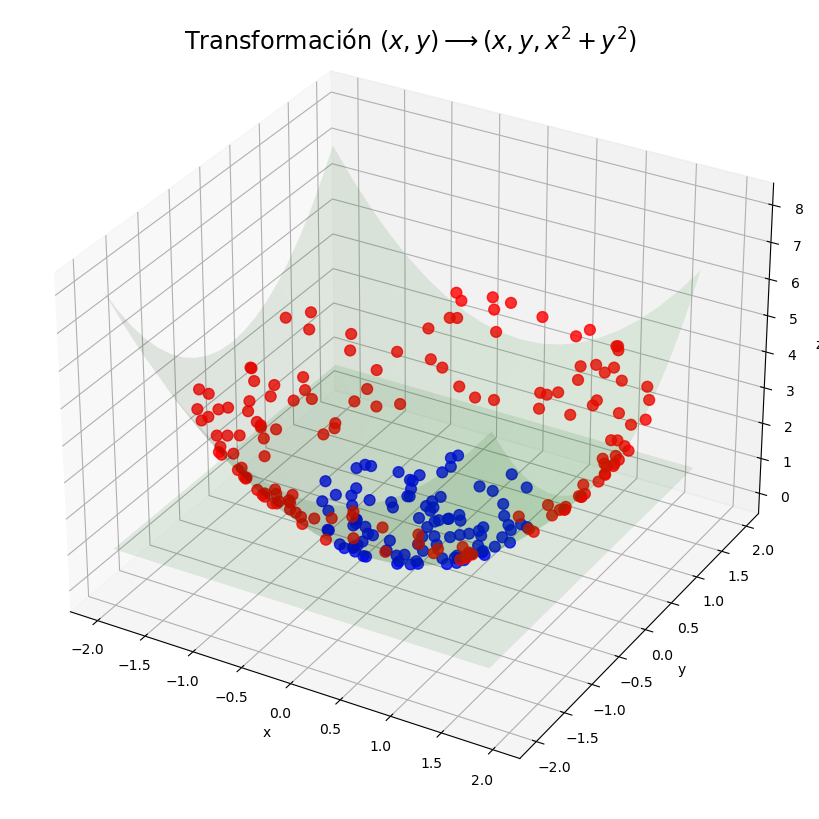

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


x = np.arange(-2, 2, 0.2)
y = np.arange(-2, 2, 0.2)

X, Y = np.meshgrid(x, y)

Z = (X**2 + Y**2) 

Z1 = X + Y - 1
Z2 = Z1-Z1 + 1

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False )
#ax = fig.gca(projection='3d')
fig.add_axes(ax)

# plano
#ax.plot_surface(X, Y, Z1, color='blue', alpha= 0.3 )
# superficie
ax.plot_surface(X, Y, Z, color='green', alpha= 0.1)
ax.plot_surface(X, Y, Z2, color='green', alpha= 0.1)

# puntos in
z_in = x_in**2 + y_in**2
ax.scatter3D(x_in,  y_in, z_in, alpha=0.8, s=60, color='blue')

# puntos out
z_out = x_out**2 + y_out**2
ax.scatter3D(x_out,  y_out, z_out, alpha=0.8, s=60, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')

plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
#plt.xticks([]) 
#plt.yticks([]) 
#plt.title('Transformación $(x,y) \longrightarrow (x,y, x^2 + y^2)$')
fig.suptitle('Transformación $(x,y) \longrightarrow (x,y, x^2 + y^2)$', fontsize='xx-large')

plt.show()

<h2> Ejemplo con datos Iris </h2>

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
# importa datos iris 
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [15]:
# Modelos
models = (
    svm.SVC(kernel="linear"),
    svm.SVC(kernel="rbf", gamma=0.7),
    svm.SVC(kernel="poly", degree=2),
    svm.SVC(kernel="poly", degree=3),
)
# Entrena los modelos
models = (clf.fit(X, y) for clf in models)

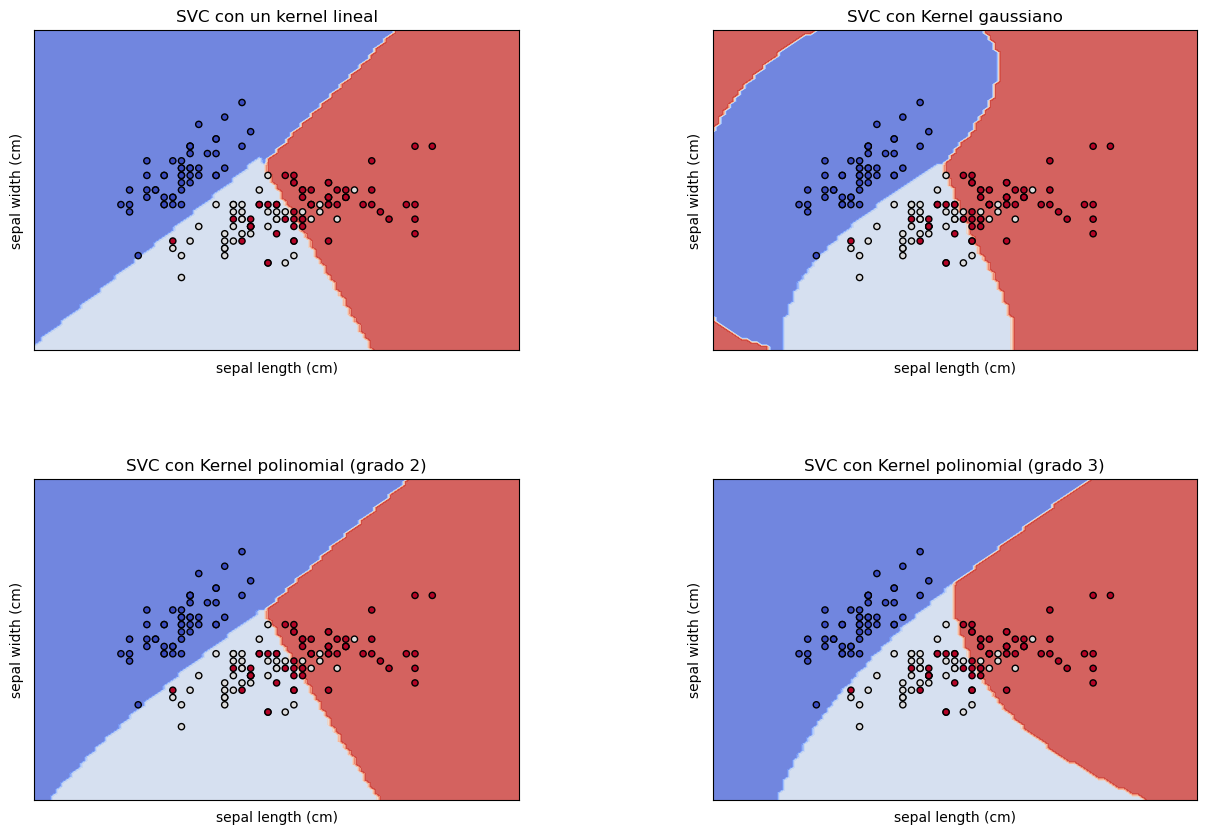

In [16]:
# Títulos para los gráficos
titles = (
    "SVC con un kernel lineal",
    "SVC con Kernel gaussiano",
    "SVC con Kernel polinomial (grado 2)",
    "SVC con Kernel polinomial (grado 3)",
)

# Grilla 2*2 para las imágenes
fig, sub = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

<h2> Ejemplo práctico: Detección del Cáncer </h2>

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd

In [18]:
breast_cancer = load_breast_cancer(as_frame=True)

In [19]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [20]:
cancer_df = pd.DataFrame(breast_cancer['data'], 
                         columns = breast_cancer['feature_names'])

cancer_df['malign'] = breast_cancer['target']

In [21]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


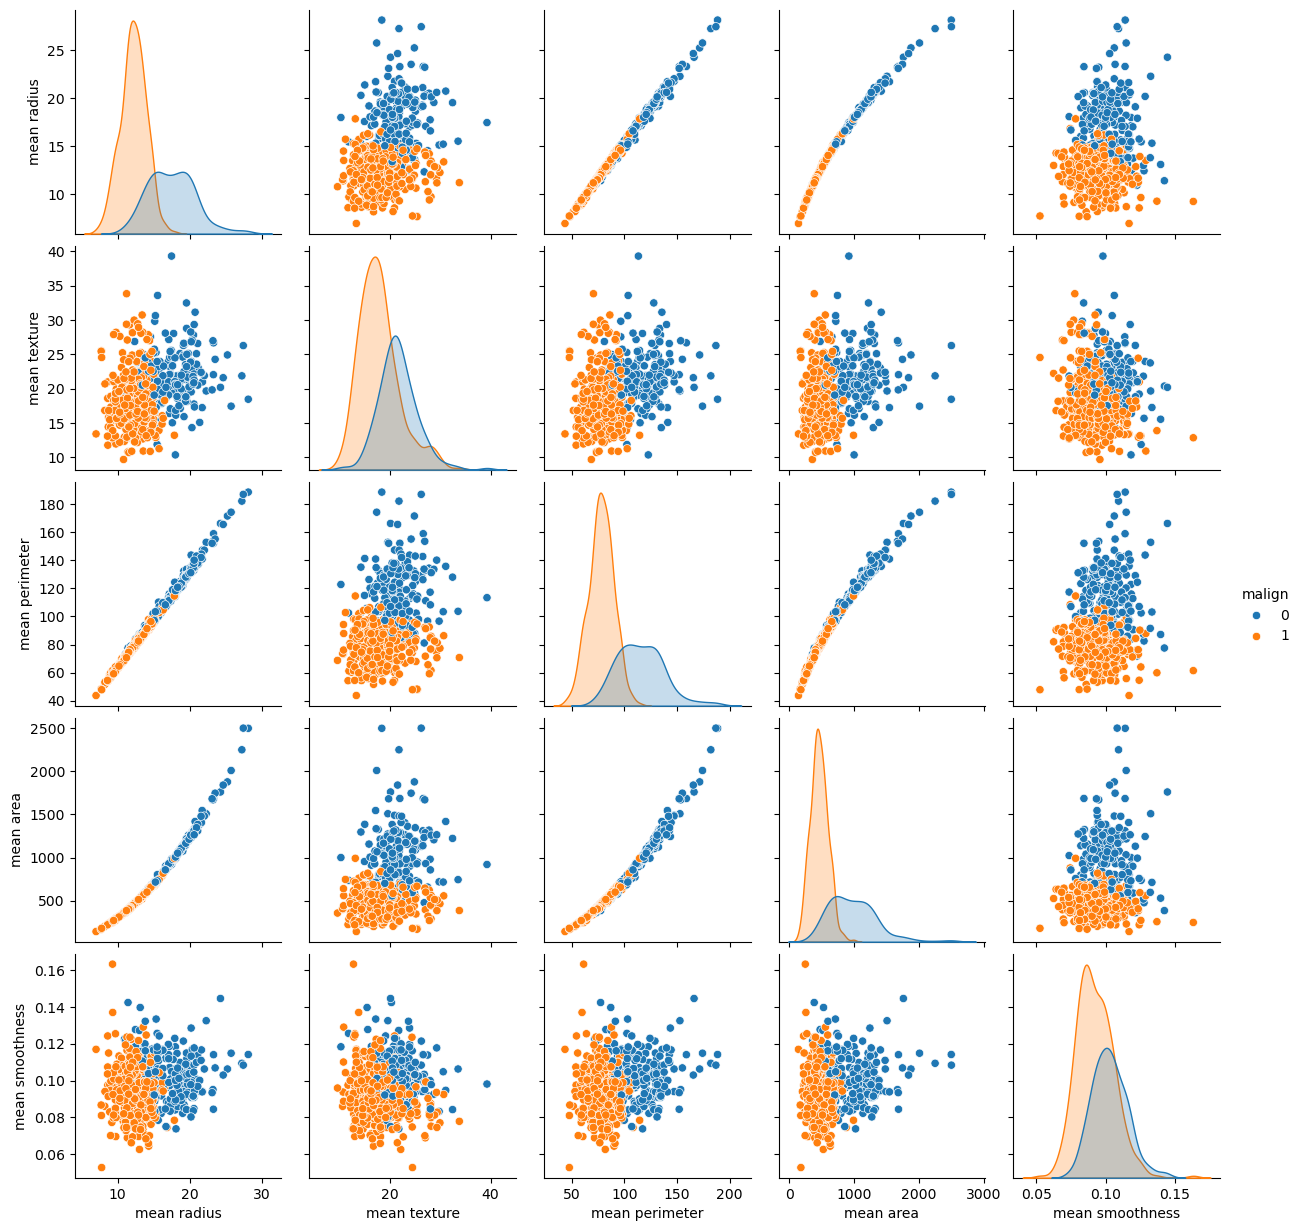

In [22]:
sns.pairplot(cancer_df, hue = 'malign', 
             vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'] )

In [23]:
X = cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]
y = cancer_df['malign']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

<h3> Kernel Lineal </h3>

In [28]:
svc = SVC()

In [29]:
svc.fit(X_train_sc, y_train)

SVC()

In [30]:
y_pred = svc.predict(X_test_sc)

In [31]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

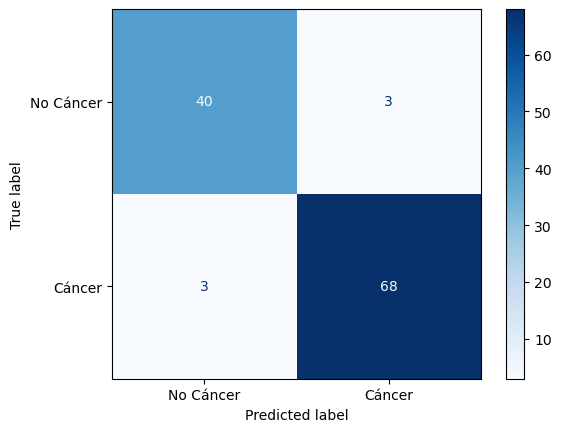

In [33]:
disp = ConfusionMatrixDisplay.from_estimator(
    svc,
    X_test_sc,
    y_test,
    display_labels=['No Cáncer', 'Cáncer'],
    cmap=plt.cm.Blues,
)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



<h2> Kernel Polinómico </h2>

In [35]:
svc_poly = svm.SVC(kernel="poly", degree=2)

In [45]:
y_pred_poly = svc_poly.predict(X_test_sc)

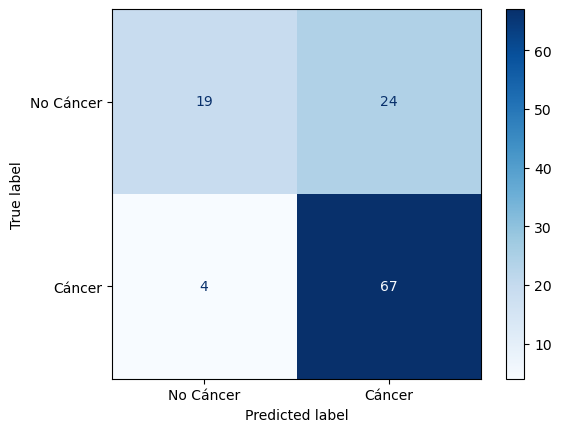

In [41]:
disp = ConfusionMatrixDisplay.from_estimator(
    svc_poly,
    X_test_sc,
    y_test,
    display_labels=['No Cáncer', 'Cáncer'],
    cmap=plt.cm.Blues,
)

In [46]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.74      0.94      0.83        71

    accuracy                           0.75       114
   macro avg       0.78      0.69      0.70       114
weighted avg       0.77      0.75      0.73       114

